In [1]:
from collections import namedtuple
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

# 横型ブラインドの計算モジュール

### 1. 平板での計算

スラット材の形状とスラットの日射反射率から任意のプロファイル角における横型ブラインドの日射透過率及び日射反射率を計算する。

### 入力値  

$ W $ ：スラット幅 (mm)  
$ d $ ：スラット高さ (mm)  
$ S $ ：スラット間隔 (mm)  
$ \rho_{S} $：スラット材の日射反射率（鏡面反射成分）  
$ \rho_{D} $：スラット材の日射反射率（拡散反射成分）  
$ \psi $：スラット角 (°)  
$ \phi $：プロファイル角 (°)  

### 出力値
$ \tau_{\phi,f} $ ：横型ブラインドの正面側からの入射光に対するプロファイル角$\phi$の日射透過率  
$ \tau_{\phi,b} $ ：横型ブラインドの背面側からの入射光に対するプロファイル角$\phi$の日射透過率  
$ \rho_{\phi,f} $ ：横型ブラインドの正面側からの入射光に対するプロファイル角$\phi$の日射反射率  
$ \rho_{\phi,b} $ ：横型ブラインドの背面側からの入射光に対するプロファイル角$\phi$の日射反射率

### 計算方法  

#### データ構造と値の範囲  

$\tau_{0,f}$・$\tau_{0,b}$・$\rho_{0,f}$の組み合わせを1つの変数（タプル）で表し"role_input"とする。  
全ての値は0.0以上1.0以下の値をとる。  
$\tau_{0,f}$ と $\rho_{0,f}$ の合計は1.0を超えない。  
$\tau_{0,b}$ と $\rho_{0,b}$ の合計は1.0を超えない。  

In [25]:
role_input = namedtuple('role_input','role_TRS0f role_TRS0b role_REF0f role_REF0b')
# role_TRS0f：正面側からの入射光に対する垂直入射時の日射透過率
# role_TRS0b：背面側からの入射光に対する垂直入射時の日射透過率
# role_REF0f：正面側からの入射光に対する垂直入射時の日射反射率
# role_REF0b：背面側からの入射光に対する垂直入射時の日射反射率

#### 入射角φの日射透過率及び日射反射率の計算

入射角によって日射特性が変化しないロールスクリーンの日射透過率及び日射反射率の計算方法を以下に示す。  

$ \begin{align}\tau_{\phi,f} = \tau_{0,f}\end{align}$ ････････････････････････････････････････････ (5.1.1.2-a)

$ \begin{align}\tau_{\phi,b} = \tau_{0,b}\end{align}$ ････････････････････････････････････････････ (5.1.1.2-b)

$ \begin{align}\rho_{\phi,f} =\rho_{0,f}\end{align}$ ････････････････････････････････････････････ (5.1.1.2-c)

$ \begin{align}\rho_{\phi,b} =\rho_{0,b}\end{align}$ ････････････････････････････････････････････ (5.1.1.2-d)  

In [26]:
# 入射角φの日射透過率及び日射反射率の計算
def role_TRSf(L, phi):
    return L.role_TRS0f

def role_TRSb(L, phi):
    return L.role_TRS0b
    
def role_REFf(L, phi):
    return L.role_REF0f
    
def role_REFb(L, phi):
    return L.role_REF0b

### 計算例

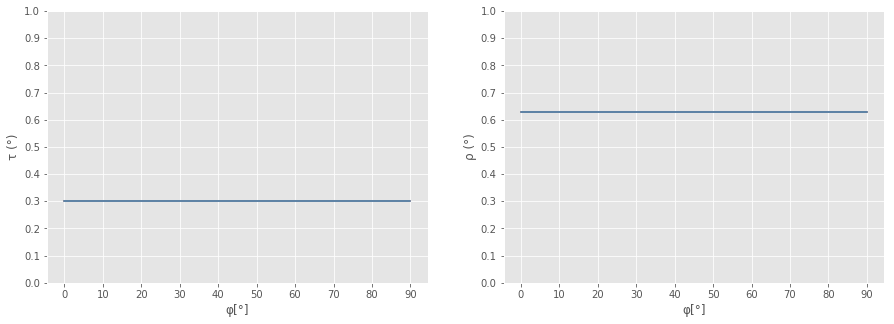

In [27]:
role_result = np.zeros((5,91))
rl_in = role_input(0.3, 0.3, 0.63, 0.63)

for j in range(0, 91):
    phi = j
    role_result[0][j] = phi
    role_result[1][j] = role_TRSf(rl_in, phi)
    role_result[2][j] = role_TRSb(rl_in, phi)
    role_result[3][j] = role_REFf(rl_in, phi)
    role_result[4][j] = role_REFb(rl_in, phi)
   
np.savetxt('role_result.csv', np.transpose(role_result), fmt='%.10f', delimiter=',')

#グラフの描画
graph_num = 2
ax = np.empty(graph_num, dtype = np.object)
fig = plt.figure(figsize = (15, 5 * ((graph_num + 1) // 2)))
plt.style.use('ggplot')

gpc = ['C0', 'C1']
gxd = [[role_result[0][0:91], role_result[0][0:91]], [role_result[0][0:91], role_result[0][0:91]]]
gyd = [[role_result[1][0:91], role_result[2][0:91]], [role_result[3][0:91], role_result[4][0:91]]]
gxl = 'φ[°]'
gyl = ['τ (°)', 'ρ (°)']
gxt = [10 * i for i in range(10)]
gyt = [0.1 * i for i in range(11)]
    
for i in range(graph_num):   
    ax[i] = fig.add_subplot((graph_num + 1) // 2, 2, i + 1)
    for j in range(2):
        ax[i].plot(gxd[i][j], gyd[i][j], color = gpc[j])
    ax[i].set_xticks(gxt)
    ax[i].set_yticks(gyt)
    ax[i].set_xlabel(gxl, fontsize = 12)
    ax[i].set_ylabel(gyl[i], fontsize = 12)

plt.show()